### Extracting image folders from zip file placed in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',timeout_ms=300000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Rice_Image_Dataset/RCD.zip.zip'

import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/rice_varieties')

### Importing data

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

In [ ]:
dataset_folder = '/content/rice_varieties'

In [ ]:
# List to store image paths and corresponding labels
image_paths = []
labels = []

In [ ]:
for variety_folder in os.listdir(dataset_folder):
    variety_path = os.path.join(dataset_folder, variety_folder)

    # Loop through each image in the variety folder
    for image_file in os.listdir(variety_path):
        image_path = os.path.join(variety_path, image_file)

        # Use OpenCV to read the image
        image = cv2.imread(image_path)

        # Check if the image is successfully read
        if image is not None:
            # Resize the image
            image = cv2.resize(image, (128, 128))

            # Append the image path and label to the lists
            image_paths.append(image_path)
            labels.append(variety_folder)
        else:
            print(f"Warning: Unable to read image at {image_path}")

In [ ]:
# Create a DataFrame to store image paths and labels
data = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [ ]:
# Display the first few rows of the DataFrame
print(data.head())

                                          image_path    label
0  /content/rice_varieties/Basmati/basmati (12138...  Basmati
1  /content/rice_varieties/Basmati/basmati (13943...  Basmati
2  /content/rice_varieties/Basmati/basmati (9253)...  Basmati
3  /content/rice_varieties/Basmati/basmati (10391...  Basmati
4  /content/rice_varieties/Basmati/basmati (8208)...  Basmati


In [ ]:
data.shape

(75000, 2)

In [ ]:
import os
import pandas as pd

invalid_filenames = []

for idx, row in data.iterrows():
    image_path = row['image_path']
    if not os.path.isfile(image_path):
        invalid_filenames.append(image_path)

In [ ]:
len(invalid_filenames)

0

## converting the dataset containing paths and labels into .csv and storing in drive

In [ ]:
csv_path = '/content/riceImagePaths.csv'

# Save the DataFrame to a CSV file
data.to_csv(csv_path, index=False)

print(f'Dataset saved to {csv_path}')

Dataset saved to /content/riceImagePaths.csv


In [ ]:
dataset = pd.read_csv(csv_path)
dataset.shape

(75000, 2)

In [ ]:
len(dataset[dataset.label=='Arborio'])

15000

In [ ]:
len(dataset[dataset.label=='Basmati'])

15000

In [ ]:
len(dataset[dataset.label=='Ipsala'])

15000

In [ ]:
len(dataset[dataset.label=='Jasmine'])

15000

In [ ]:
len(dataset[dataset.label=='Karacadag'])

15000

### Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset.head(3)

,image_path,label
0,/content/rice_varieties/Basmati/basmati (12138...,Basmati
1,/content/rice_varieties/Basmati/basmati (13943...,Basmati
2,/content/rice_varieties/Basmati/basmati (9253)...,Basmati


In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.1, random_state=32)

In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(train_data , test_size=0.1, random_state=32)

In [ ]:
# Create an ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    shear_range=0.2,           # Shear intensity
    zoom_range=0.2,            # Zoom range
    horizontal_flip=True       # Horizontal flip
)

In [ ]:
# Create an ImageDataGenerator for validation data (only normalization)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create an ImageDataGenerator for test data (only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Define batch size
batch_size = 32

In [ ]:
image_size = (128,128)

In [ ]:
# Create the train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 60750 validated image filenames belonging to 5 classes.


In [ ]:
# Create the validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'   # Use 'categorical' for multi-class classification
)

Found 6750 validated image filenames belonging to 5 classes.


In [ ]:
# Create the validation generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'   # Use 'categorical' for multi-class classification
)

Found 6750 validated image filenames belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
val_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
test_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
next(train_generator)[0].shape

(32, 128, 128, 3)

In [ ]:
next(train_generator)[1].shape

(32, 5)

In [ ]:
next(val_generator)[0].shape

(32, 128, 128, 3)

In [ ]:
next(val_generator)[1].shape

(32, 5)

In [ ]:
next(test_generator)[0].shape

(32, 128, 128, 3)

In [ ]:
next(test_generator)[1].shape

(32, 5)

In [ ]:
import matplotlib.pyplot as plt

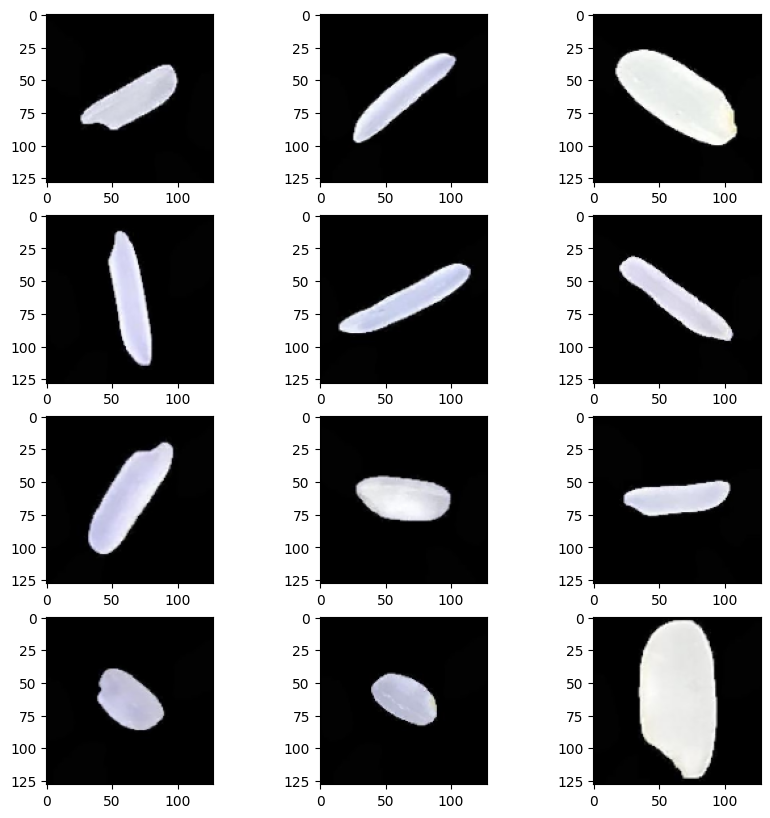

In [ ]:
plt.figure(figsize = (10,10))
for idx,each_batch in enumerate(train_generator,1):  # starting idx from 1
  img = each_batch[0][0]
  plt.subplot(4,3,idx) # here considering idx as position
  plt.imshow(img)
  if idx >= 12:
    break

### VGG16 Model Loading

In [ ]:
from tensorflow.keras.models import load_model

# Specify the path to the uploaded .h5 file
model_path = '/content/best_VGG16_model (1).h5'

# Load the model
vgg16_finetuned_model = load_model(model_path)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

### Evaluating VGG16 model on train data

In [ ]:
# Evaluate the VGG-16 finetuned model on the train set
vgg16_finetuned_train_result = vgg16_finetuned_model.evaluate(train_generator, steps=len(train_generator))

train_true = train_generator.classes

1899/1899 [==============================] - 12887s 7s/step - loss: 0.0647 - accuracy: 0.9768


In [ ]:
# Make predictions with the VGG-16 finetuned model -- for train data
vgg16_finetuned_predictions = vgg16_finetuned_model.predict(train_generator, steps=len(train_generator))
vgg16_finetuned_pred_labels = np.argmax(vgg16_finetuned_predictions, axis=1)

1899/1899 [==============================] - 12533s 7s/step


In [ ]:
# Confusion matrix for VGG-16 finetuned model -- for train data
vgg16_finetuned_conf_matrix = confusion_matrix(train_true, vgg16_finetuned_pred_labels)

# Classification report for VGG-16 finetuned model -- for train data
vgg16_finetuned_class_report = classification_report(train_true, vgg16_finetuned_pred_labels)

# Print evaluation results for VGG-16 finetuned model -- for train data
print("\n\nEvaluation Results for test data -- VGG-16 Finetuned:")
print("Loss:", vgg16_finetuned_train_result[0])
print("Accuracy:", vgg16_finetuned_train_result[1])

print("\nConfusion matrix : \n")
print(vgg16_finetuned_conf_matrix)

print("\Classification Report : \n")
print(vgg16_finetuned_class_report)



Evaluation Results for test data -- VGG-16 Finetuned:
Loss: 0.06473194062709808
Accuracy: 0.9768230319023132

Confusion matrix : 

[[2430 2411 2400 2549 2472]
 [2378 2295 2462 2450 2468]
 [2457 2247 2441 2519 2484]
 [2402 2218 2375 2582 2520]
 [2415 2334 2413 2562 2466]]
\Classification Report : 

              precision    recall  f1-score   support

           0       0.20      0.20      0.20     12262
           1       0.20      0.19      0.19     12053
           2       0.20      0.20      0.20     12148
           3       0.20      0.21      0.21     12097
           4       0.20      0.20      0.20     12190

    accuracy                           0.20     60750
   macro avg       0.20      0.20      0.20     60750
weighted avg       0.20      0.20      0.20     60750



### Evaluating VGG16 model on validation data

In [ ]:
# Evaluate the VGG-16 finetuned model on the validation set
vgg16_finetuned_val_result = vgg16_finetuned_model.evaluate(val_generator, steps=len(val_generator))

val_true = val_generator.classes

# Make predictions with the VGG-16 finetuned model -- for validation data
vgg16_finetuned_predictions = vgg16_finetuned_model.predict(val_generator, steps=len(val_generator))
vgg16_finetuned_pred_labels = np.argmax(vgg16_finetuned_predictions, axis=1)

# Confusion matrix for VGG-16 finetuned model -- for validation data
vgg16_finetuned_conf_matrix = confusion_matrix(val_true, vgg16_finetuned_pred_labels)

# Classification report for VGG-16 finetuned model -- for validation data
vgg16_finetuned_class_report = classification_report(val_true, vgg16_finetuned_pred_labels)

# Print evaluation results for VGG-16 finetuned model -- for validation data
print("\n\nEvaluation Results for test data -- VGG-16 Finetuned:")
print("Loss:", vgg16_finetuned_val_result[0])
print("Accuracy:", vgg16_finetuned_val_result[1])

print("\nConfusion matrix : \n")
print(vgg16_finetuned_conf_matrix)

print("\Classification Report : \n")
print(vgg16_finetuned_class_report)

211/211 [==============================] - 1403s 7s/step


Evaluation Results for test data -- VGG-16 Finetuned:
Loss: 0.041809871792793274
Accuracy: 0.9859259128570557

Confusion matrix : 

[[245 258 235 270 251]
 [268 283 294 286 291]
 [233 286 263 306 235]
 [274 296 253 264 313]
 [264 250 278 308 246]]
\Classification Report : 

              precision    recall  f1-score   support

           0       0.19      0.19      0.19      1259
           1       0.21      0.20      0.20      1422
           2       0.20      0.20      0.20      1323
           3       0.18      0.19      0.19      1400
           4       0.18      0.18      0.18      1346

    accuracy                           0.19      6750
   macro avg       0.19      0.19      0.19      6750
weighted avg       0.19      0.19      0.19      6750



### Evaluating VGG16 model on test data

In [ ]:
# Evaluate the VGG-16 finetuned model on the test set
vgg16_finetuned_test_result = vgg16_finetuned_model.evaluate(test_generator, steps=len(test_generator))

test_true = test_generator.classes

# Make predictions with the VGG-16 finetuned model -- for test data
vgg16_finetuned_predictions = vgg16_finetuned_model.predict(test_generator, steps=len(test_generator))
vgg16_finetuned_pred_labels = np.argmax(vgg16_finetuned_predictions, axis=1)

# Confusion matrix for VGG-16 finetuned model -- for test data
vgg16_finetuned_conf_matrix = confusion_matrix(test_true, vgg16_finetuned_pred_labels)

# Classification report for VGG-16 finetuned model -- for test data
vgg16_finetuned_class_report = classification_report(test_true, vgg16_finetuned_pred_labels)

# Print evaluation results for VGG-16 finetuned model -- for test data
print("\n\nEvaluation Results for test data -- VGG-16 Finetuned:")
print("Loss:", vgg16_finetuned_test_result[0])
print("Accuracy:", vgg16_finetuned_test_result[1])

print("\nConfusion matrix : \n")
print(vgg16_finetuned_conf_matrix)

print("\Classification Report : \n")
print(vgg16_finetuned_class_report)

211/211 [==============================] - 1421s 7s/step


Evaluation Results for test data -- VGG-16 Finetuned:
Loss: 0.041809868067502975
Accuracy: 0.9859259128570557

Confusion matrix : 

[[234 246 261 268 250]
 [268 280 287 297 290]
 [252 291 271 271 238]
 [274 301 247 310 268]
 [256 255 257 288 290]]
\Classification Report : 

              precision    recall  f1-score   support

           0       0.18      0.19      0.18      1259
           1       0.20      0.20      0.20      1422
           2       0.20      0.20      0.20      1323
           3       0.22      0.22      0.22      1400
           4       0.22      0.22      0.22      1346

    accuracy                           0.21      6750
   macro avg       0.20      0.20      0.20      6750
weighted avg       0.21      0.21      0.21      6750

